In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import DBSCAN

In [2]:
data_frame = pd.read_csv('/home/mytrah-pc/Mytrah_Adithya/data_turbine/ScatterData_Mokal_MK014.csv')

In [3]:
num_rows = data_frame.shape[0]
filter_data_frame = data_frame.copy()[['ActivePower', 'WindSpeed']]
filter_data_frame['set_in'] = -2
min_active_power = filter_data_frame['ActivePower'].min()
max_active_power = filter_data_frame['ActivePower'].max()
min_wind_speed = filter_data_frame['WindSpeed'].min()
max_wind_speed = filter_data_frame['WindSpeed'].max()
global_max_p = max_active_power
global_min_p = min_active_power

In [4]:
"""
Subract all active power by min_active_power    
Subract all wind speed by min_wind_speed
Divide all active power by max_active_power - min_active_power
Divide all wind speed by max_wind_speed - min_wind_speed
"""
filter_data_frame['ActivePowerScaled'] = ((filter_data_frame['ActivePower'] - min_active_power) * 20) \
                                    / (max_active_power - min_active_power)

filter_data_frame['WindSpeedScaled'] = ((filter_data_frame['WindSpeed'] - min_wind_speed) * 20) \
                                    / (max_wind_speed - min_wind_speed)

In [5]:
scan = DBSCAN(eps=0.28, min_samples=15).fit_predict(filter_data_frame[['ActivePowerScaled', 'WindSpeedScaled']])

In [6]:
filter_data_frame['set_in'] = scan

In [7]:
import random
r = lambda: random.randint(0,255)

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

In [9]:
num_of_groups = 0
static_compare = -1
static_max = -2
for group in filter_data_frame.groupby('set_in'):
    num_of_groups = num_of_groups + 1

    if len(group[1]) > static_compare:
        static_compare = len(group[1])
        static_max = group[0]
    
    plt.scatter(
        group[1]['WindSpeed'],
        group[1]['ActivePower'],
        s=np.pi*2*2,
        c='#%02X%02X%02X' % (r(),r(),r())
    )



In [10]:
loop_list = list(range(9) - np.ones(9))
del loop_list[loop_list.index(static_max)]

In [11]:
temp_frame = pd.concat([filter_data_frame[filter_data_frame['set_in'] == i] for i in loop_list])
data_frame = temp_frame[(temp_frame['ActivePower'] < (global_max_p - global_min_p) * 0.8) & (temp_frame['ActivePower'] > (global_max_p - global_min_p) * 0.2)]

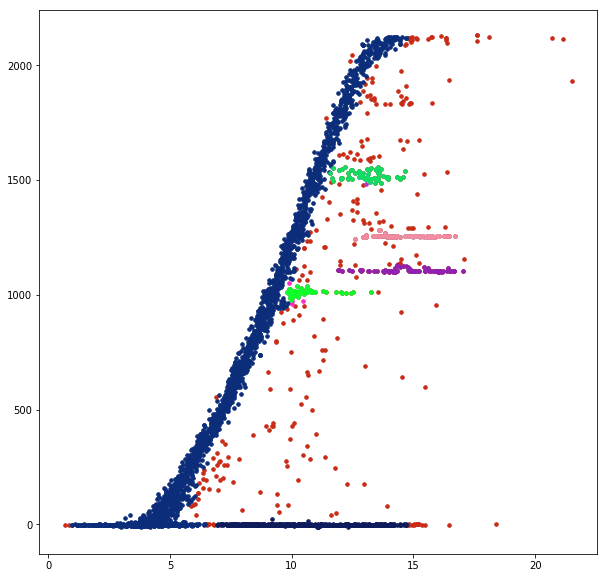

In [12]:
num_rows = data_frame.shape[0]
filter_data_frame = data_frame.copy()[['ActivePower', 'WindSpeed']]
filter_data_frame['set_in'] = -2
min_active_power = filter_data_frame['ActivePower'].min()
max_active_power = filter_data_frame['ActivePower'].max()
min_wind_speed = filter_data_frame['WindSpeed'].min()
max_wind_speed = filter_data_frame['WindSpeed'].max()

"""
Subract all active power by min_active_power    
Subract all wind speed by min_wind_speed
Divide all active power by max_active_power - min_active_power
Divide all wind speed by max_wind_speed - min_wind_speed
"""
filter_data_frame['ActivePowerScaled'] = ((filter_data_frame['ActivePower'] - min_active_power) * 1) \
                                    / (max_active_power - min_active_power)

filter_data_frame['WindSpeedScaled'] = ((filter_data_frame['WindSpeed'] - min_wind_speed) * 0.1) \
                                    / (max_wind_speed - min_wind_speed)

scan = DBSCAN(eps=2.5/200, min_samples=15).fit_predict(filter_data_frame[['ActivePowerScaled', 'WindSpeedScaled']])

filter_data_frame['set_in'] = scan

import random
r = lambda: random.randint(0,255)

num_of_groups = 0
static_compare = -1
static_max = -2
for group in filter_data_frame.groupby('set_in'):
    num_of_groups = num_of_groups + 1

    if len(group[1]) > static_compare:
        static_compare = len(group[1])
        static_max = group[0]
    
    if(group[0] == -1):
        continue
        
    plt.scatter(
        group[1]['WindSpeed'],
        group[1]['ActivePower'],
        s=np.pi*2*2,
        c='#%02X%02X%02X' % (r(),r(),r())
    )

    
plt.show()